In [58]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [59]:
import matplotlib
import matplotlib.pyplot as plt
import glob
import math
import numpy as np
import pandas as pd
from bisect import *
from decimal import Decimal
from scipy.optimize import curve_fit

In [60]:
chi2 = np.array([1.1,1.6832680195,2.1419517475,2.4151718822,2.8056427254,2.883004237,2.9962983052,3.07511163,3.2028987131,3.3467331513,3.2110779156,3.4331270667,3.6743670329])
err =np.array([0.014508,0.00843219,0.0225587,0.0419361,0.0702273,0.0938654,0.114591,0.136352,0.166318,0.195104,0.188938,0.244216,0.30525])
bin_edges = np.array([0.1,1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1,10.1,11.1,12.1,13.1])
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

print len(chi2),len(err),len(bin)

13 13 14


[ 0.68177776  0.74609577 -0.08035491  0.00315399]
[1.10118872 1.68274116 2.13386206 2.47347532 2.72050485 2.89387457
 3.01250838 3.09533021 3.16126396 3.22923354 3.31816288 3.44697587
 3.63459643]


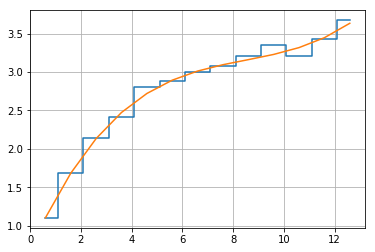

In [61]:
  # Define model function to be used to fit to the data above:
  def p2(x, *p):
    a0,a1,a2 = p
    a3=0
    return a0+x*(a1+x*(a2+a3*x))

  def p3(x, *p):
    a0,a1,a2,a3 = p
    return a0+x*(a1+x*(a2+a3*x))

  # p0 is the initial guess for the fitting coefficients
  p0 = [1., 0.5, 0.,0.]

  coeff, var_matrix = curve_fit(p3, bin_centres, chi2, p0=p0, sigma=err)
  print coeff
  # Get the fitted curve
  hist_fit = p3(bin_centres, *coeff)
  print hist_fit
  plt.step(bin_centres, chi2, label='', where='mid')
  plt.plot(bin_centres, hist_fit, label='')
  plt.grid()
  plt.show()

